# Regression Models 

## regression models used : 

1. Random Forest Regression( Ensemble : Bagging )
3. Linear Regression 
4. Ridge Regression
5. Lasso Regression


In [1]:
# General Imports 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error


In [2]:
df = pd.read_csv("/content/final_data.csv" , index_col= False  )

In [3]:
df.drop("Unnamed: 0" , axis=1, inplace=True)
df.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Years_used,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,0.093123,0.057109,0.053053,0,0.266667,0,1,0,1
1,0.133238,0.099913,0.085085,0,0.333333,1,0,0,1
2,0.204871,0.103273,0.012813,0,0.066667,0,1,0,1
3,0.078797,0.041504,0.009409,0,0.466667,0,1,0,1
4,0.128940,0.070980,0.083984,0,0.266667,1,0,0,1


In [4]:

X= df.iloc[:,1:] # other features 
y= df.iloc[:,0] # selling price

### Split the data into train and test 

In [5]:
# Train-Test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# 1. RandomForest Regressor 

In [6]:
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestRegressor # used for prediction 
from sklearn.model_selection import RandomizedSearchCV # hyperparameter tuning 

In [7]:
regressor=RandomForestRegressor()


### Hyperparameter Tuning


#### Hyperparaymeter tuening using Randomized Search CV

In [8]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]


# Number of features to consider at every split
max_features = ['auto', 'sqrt']


# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
 
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]


# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [9]:

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

# print(random_grid)

In [10]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()

In [11]:
# Random search of parameters, using 5 fold cross validation, 
 
rf_random = RandomizedSearchCV(estimator = rf, 
                               param_distributions = random_grid,
                               scoring='neg_mean_squared_error', 
                               n_iter = 10, 
                               cv = 5, 
                               verbose=2, 
                               random_state=42, 
                               n_jobs = 1)

In [12]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.2s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.2s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.2s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.2s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.2s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   1.4s
[CV] n_estimators=1100, min_samples_split=10, mi

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   48.4s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [13]:

# Best parameters choosen 

rf_random.best_params_

{'max_depth': 25,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 1000}

In [14]:
# Get best score

rf_random.best_score_

-0.0014656546080770796

In [15]:
predictions=rf_random.predict(X_test)

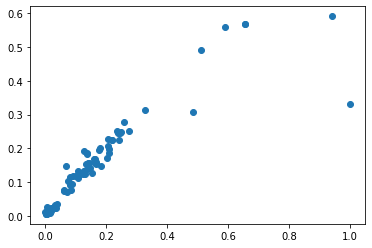

In [16]:
plt.scatter(y_test,predictions)

In [19]:
RMSE_model1_RfR = np.sqrt(mean_squared_error(y_test, predictions))

print(RMSE_model1_RfR)

0.08439325833742607


# 2. Linear Regression 

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
# Linear Regression Model 

model2_LR = LinearRegression()

In [22]:

model2_LR.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [23]:

predictions_LR = model2_LR.predict(X_test)

In [24]:
model2_LR.intercept_

0.0674002428504203

In [25]:
model2_LR.coef_

array([ 1.3072465 , -0.03484444,  0.00907788, -0.17977957,  0.0552322 ,
        0.02103337, -0.02222454, -0.00631713])

In [26]:

cols =  [ 'Present_Price',	'Kms_Driven' ,	'Owner', 	'Years_used',	'Fuel_Type_Diesel',	'Fuel_Type_Petrol' ,	'Seller_Type_Individual' ,	'Transmission_Manual']

cdf_L2 = pd.DataFrame(model2_LR.coef_, cols , columns=['Coeff']) 

cdf_L2

,Coeff
Present_Price,1.307247
Kms_Driven,-0.034844
Owner,0.009078
Years_used,-0.179780
Fuel_Type_Diesel,0.055232
Fuel_Type_Petrol,0.021033
Seller_Type_Individual,-0.022225
Transmission_Manual,-0.006317


In [27]:

# model performance 
# score and RMSE 
 
RMSE_model2_LR  = np.sqrt(mean_squared_error(y_test, predictions_LR))

print(RMSE_model2_LR)

0.0712472743690608


# 3. Ridge Regression 

In [28]:
from sklearn.linear_model import Ridge


# Selectig the proper value of alpha 

alpha_and_scores = [] # a list of touples (alpha, crossponding score)

range_alpha = np.arange(0.001, 1, 0.01) 


for i in range_alpha:

    sample_model = Ridge(alpha = i, normalize = True)
    sample_model.fit(X_train, y_train)

    preds = sample_model.predict(X_test)

    tup = (i , sample_model.score(X_test,y_test)   )

    alpha_and_scores.append(tup)


alpha_and_scores.sort(key = lambda x: x[1])

# print(alpha_and_scores)

best_alpha = alpha_and_scores[0][0]

best_alpha

0.9909999999999999

In [29]:

# Ridge regression Model 

model3_RR = Ridge(alpha = best_alpha)



In [30]:
model3_RR.fit(X_train, y_train)



Ridge(alpha=0.9909999999999999, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [31]:
predictions_RR = model3_RR.predict(X_test)

In [32]:
cdf_L2 = pd.DataFrame(model3_RR.coef_, cols , columns=['Coeff']) 

cdf_L2

,Coeff
Present_Price,0.431173
Kms_Driven,-0.033574
Owner,-0.003462
Years_used,-0.144097
Fuel_Type_Diesel,0.075003
Fuel_Type_Petrol,-0.018383
Seller_Type_Individual,-0.081246
Transmission_Manual,-0.078402


In [33]:
RMSE_model3_RR  = mean_squared_error(y_test, predictions_RR)**(0.5)

print(RMSE_model3_RR)

0.09453675535586727


# 4. Lasso Regression

In [34]:
# Lasso Regression Model
from sklearn.linear_model import Lasso

model4_LaR = Lasso(alpha = 14)

In [35]:
model4_LaR.fit(X_train, y_train)


Lasso(alpha=14, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False,
      positive=False, precompute=False, random_state=None, selection='cyclic',
      tol=0.0001, warm_start=False)

In [36]:
predictions_LaR = model4_LaR.predict(X_test)

In [37]:
cdf_L4 = pd.DataFrame(model4_LaR.coef_, cols , columns=['Coeff']) 

cdf_L4

,Coeff
Present_Price,0.0
Kms_Driven,0.0
Owner,-0.0
Years_used,-0.0
Fuel_Type_Diesel,0.0
Fuel_Type_Petrol,-0.0
Seller_Type_Individual,-0.0
Transmission_Manual,-0.0


In [38]:
RMSE_model4_LaR  = mean_squared_error(y_test, predictions_LaR)**(0.5)

In [39]:
print(RMSE_model4_LaR)

0.18501145645000575


## Best Model 

### :: >> RandomForest Regressor 

## Saving the file 

In [40]:

import pickle
# open a file, where you ant to store the data
file = open('cars_random_forest_regression_model.pkl', 'wb')

# dump information to that file
pickle.dump(rf_random, file)